<a href="https://colab.research.google.com/github/Supratikdey2002/customer_exit_prediction/blob/main/deep_learning_customer_exit_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [ ]:
##import basic library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
## divide dependent and independent feature
x=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [ ]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [ ]:
#feature engineering->one hot encoding
geography=pd.get_dummies(x['Geography'],drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)

In [ ]:
 ## concatenate these variable with dataframe
 x_train = x_train.drop(columns=['Geography', 'Gender'])
x_test = x_test.drop(columns=['Geography', 'Gender'])

 x=pd.concat([x,geography,gender],axis=1)

In [ ]:
## splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.dtypes)


CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Germany               bool
Spain                 bool
Male                  bool
dtype: object


In [ ]:
#feature Scaling->it is used only in distance based and gradient descent algorithm like lr,lgr,knn,kmean
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
x_train.shape

(8000, 11)

In [ ]:
## lets create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
#lets initialize the ANN
classifier=Sequential()

In [ ]:
## adding the input layer
classifier.add(Dense(units=17,activation='relu'))

In [ ]:
## adding the hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.3))
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.4))



In [ ]:
## adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [ ]:
# train the neural network
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
## early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
classifier_history = classifier.fit(x_train, y_train, validation_split=0.33, batch_size=10, epochs=100, callbacks=[early_stopping])

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7975 - loss: 0.5737 - val_accuracy: 0.7955 - val_loss: 0.4731
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8027 - loss: 0.4731 - val_accuracy: 0.7955 - val_loss: 0.4539
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7914 - loss: 0.4750 - val_accuracy: 0.7955 - val_loss: 0.4350
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7881 - loss: 0.4619 - val_accuracy: 0.7955 - val_loss: 0.4276
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7896 - loss: 0.4471 - val_accuracy: 0.7955 - val_loss: 0.4191
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7937 - loss: 0.4367 - val_accuracy: 0.7955 - val_loss: 0.4158
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7896 - loss: 0.4295 - val_accuracy: 0.7955 - val_loss: 0.4079
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8020 - loss: 0.4093 - val_accu

In [ ]:
classifier_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

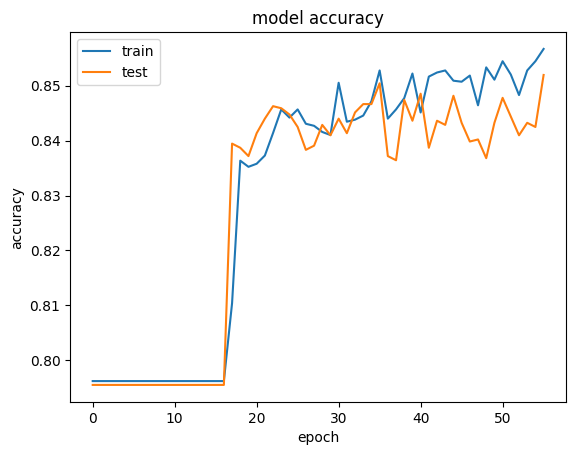

In [ ]:
# summarize the history for accuracy
plt.plot(classifier_history.history['accuracy'])
plt.plot(classifier_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

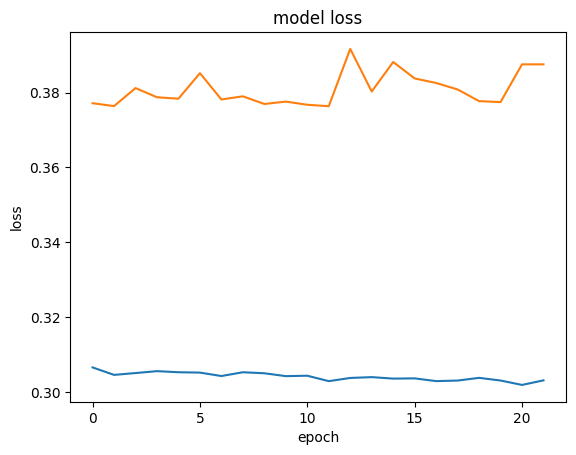

In [ ]:
## plot it for loss
plt.plot(classifier_history.history['loss'])
plt.plot(classifier_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend
plt.show()


In [ ]:
# predict and evaluating the model
y_pred=classifier.predict(x_test)
y_pred=(y_pred>0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
# make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1513,   82],
       [ 210,  195]])

In [ ]:
#calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.854

In [ ]:
# get weight
classifier.get_weights()

[array([[ 0.0181452 ,  0.16780055, -0.56522924, -0.03147518, -0.56616116,
          0.35018685,  0.07175426, -0.24691914,  0.11767066,  0.04098404,
          0.3732837 , -0.0578851 , -0.00898973,  0.3082564 , -0.01829231,
          0.24836506, -0.27578402],
        [-0.76937324,  0.39456388,  0.37709782,  0.3179896 ,  0.2689602 ,
         -0.03206762,  0.8290291 , -1.1041994 ,  0.06928474,  0.41834754,
         -0.32241872, -0.25339663, -0.6188488 ,  0.07530168, -0.40632585,
          0.14137939, -0.4447202 ],
        [-0.04430242, -0.1731825 ,  0.31641075,  0.33374786, -0.34382427,
          0.53757524,  0.27019283, -0.18753076,  0.33385253, -0.03751215,
          0.11492538,  0.0486887 ,  0.25432056,  0.37603405, -0.05293939,
          0.81692886,  0.22092517],
        [ 0.42413083,  0.3776479 , -0.07457594,  0.06045222, -0.10133679,
         -0.42158276,  0.5207105 , -0.1383852 , -0.35521868, -0.11494703,
          0.19197246,  0.05126831,  0.41262466, -0.99211687, -0.02835559,
    